In [1]:
import warnings
warnings.filterwarnings("ignore")

import os
import os.path as op
import pickle as pkl

import numpy as np

import matplotlib.pyplot as plt
import cartopy.crs as ccrs

import plotly.express as px
import plotly.graph_objects as go

In [2]:
# path
p_db = op.join(os.getcwd(),'..','..','data','Extra')

# database precipitation (xls file)
p_dat = op.join(p_db, 'data_tcs.pkl')

In [3]:
data = pkl.load(open(p_dat, 'rb'))
data

storm                          time         lon        lat   pres  \
4471    9245 1981-12-18 12:00:00.000040448  172.000000  -9.000000  997.0   
4472    9245 1981-12-19 00:00:00.000040448  169.950012  -9.450001  997.0   
4473    9245 1981-12-19 12:00:00.000040448  169.000000  -9.800001  990.0   
4474    9245 1981-12-20 00:00:00.000040448  168.199997 -11.000000  987.0   
4475    9245 1981-12-20 12:00:00.000040448  167.399994 -12.200000  980.0   
...      ...                           ...         ...        ...    ...   
14871  13476 2021-01-30 09:00:00.000039936  177.120346 -16.684896  988.0   
14872  13476 2021-01-30 12:00:00.000039936  177.399994 -16.799999  986.0   
14873  13476 2021-01-30 15:00:00.000039936  177.807175 -17.112688  982.0   
14895  13477 2021-01-30 18:00:00.000039936  171.399994 -11.900000  994.0   
14896  13477 2021-01-30 21:00:00.000039936  172.074463 -11.952932  993.0   

             sst        mld  category  
4471   29.580000  64.541672         1  
4472   27.840000  80.874992         1  
4473   28.859999  66.666664         1  
4474   28.719999  68.333336         1  
4475   28.750000  56.750000         1  
...          ...        ...       ...  
14871  29.459999  23.416666         1  
14872  29.500000  23.416666         1  
14873  29.000000  22.458334         1  
14895  29.900000  52.250000         1  
14896  29.840000  58.416664         1  

[5518 rows x 8 columns]

In [4]:
data = data.set_index('time')
data

storm         lon        lat   pres        sst  \
time                                                                            
1981-12-18 12:00:00.000040448   9245  172.000000  -9.000000  997.0  29.580000   
1981-12-19 00:00:00.000040448   9245  169.950012  -9.450001  997.0  27.840000   
1981-12-19 12:00:00.000040448   9245  169.000000  -9.800001  990.0  28.859999   
1981-12-20 00:00:00.000040448   9245  168.199997 -11.000000  987.0  28.719999   
1981-12-20 12:00:00.000040448   9245  167.399994 -12.200000  980.0  28.750000   
...                              ...         ...        ...    ...        ...   
2021-01-30 09:00:00.000039936  13476  177.120346 -16.684896  988.0  29.459999   
2021-01-30 12:00:00.000039936  13476  177.399994 -16.799999  986.0  29.500000   
2021-01-30 15:00:00.000039936  13476  177.807175 -17.112688  982.0  29.000000   
2021-01-30 18:00:00.000039936  13477  171.399994 -11.900000  994.0  29.900000   
2021-01-30 21:00:00.000039936  13477  172.074463 -11.952932  993.0  29.840000   

                                     mld  category  
time                                                
1981-12-18 12:00:00.000040448  64.541672         1  
1981-12-19 00:00:00.000040448  80.874992         1  
1981-12-19 12:00:00.000040448  66.666664         1  
1981-12-20 00:00:00.000040448  68.333336         1  
1981-12-20 12:00:00.000040448  56.750000         1  
...                                  ...       ...  
2021-01-30 09:00:00.000039936  23.416666         1  
2021-01-30 12:00:00.000039936  23.416666         1  
2021-01-30 15:00:00.000039936  22.458334         1  
2021-01-30 18:00:00.000039936  52.250000         1  
2021-01-30 21:00:00.000039936  58.416664         1  

[5518 rows x 7 columns]

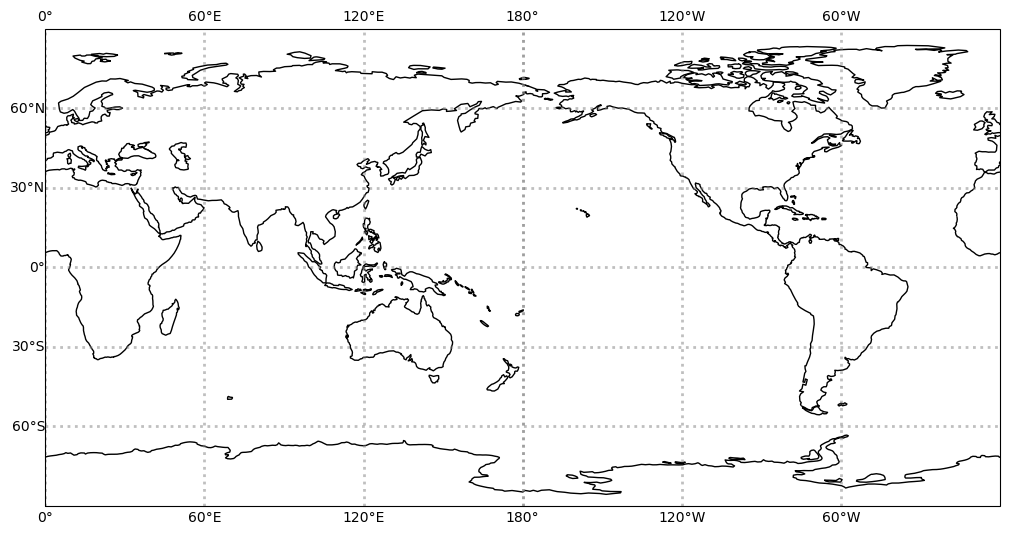

In [5]:
plt.figure(figsize=(13,6.2))    
ax = plt.subplot(111, projection=ccrs.PlateCarree(central_longitude = 180))

ax.coastlines(zorder=2);
ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True, linewidth=2, color='gray', linestyle=':',  alpha=.5)

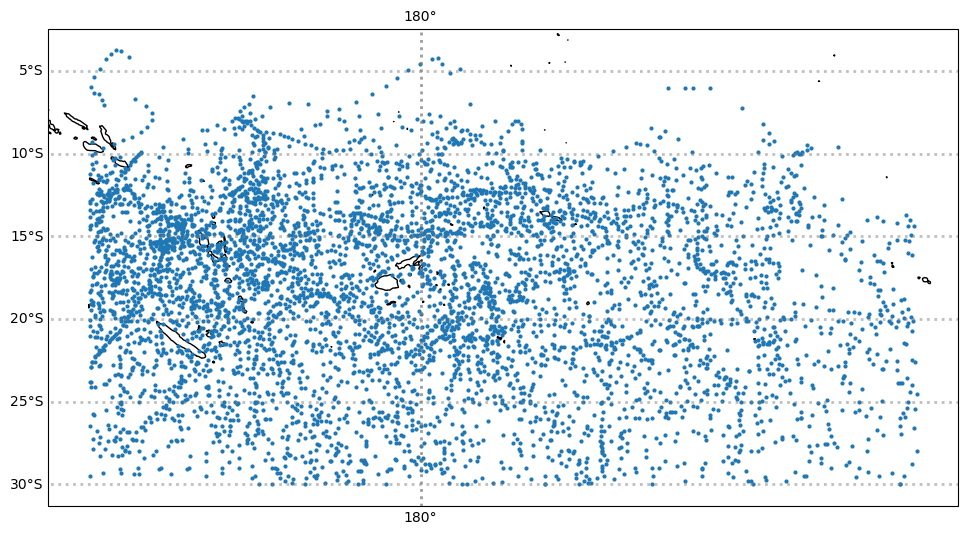

In [27]:
plt.figure(figsize=(13,6.2))    
ax = plt.subplot(111, projection=ccrs.PlateCarree(central_longitude = 180))

ax.coastlines(zorder=2);
ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True, linewidth=2, color='gray', linestyle=':',  alpha=.5)

ax.plot(data.lon, data.lat, '.', markersize=4, transform=ccrs.PlateCarree())

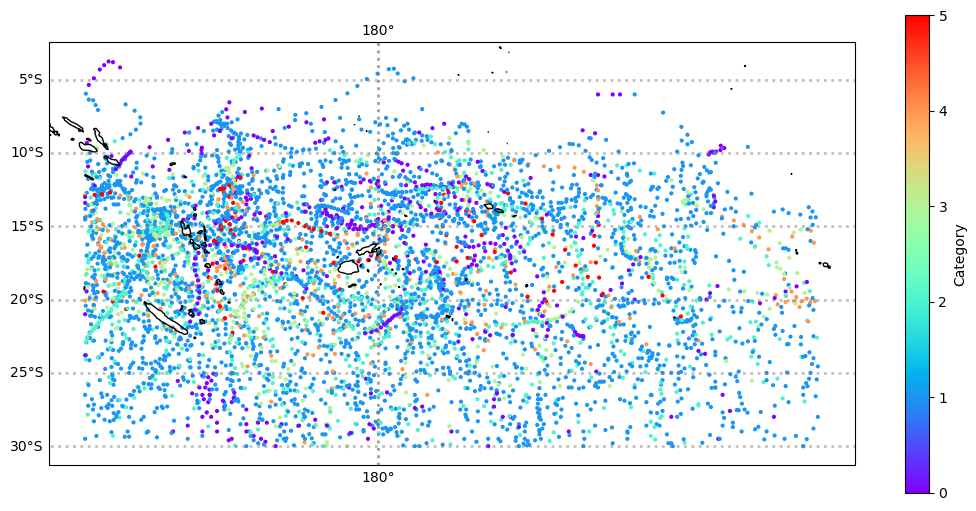

In [28]:
plt.figure(figsize=(13,6.2))
    
ax = plt.subplot(111, projection=ccrs.PlateCarree(central_longitude = 180))
ax.coastlines(zorder=2);
ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True, linewidth=2, color='gray', linestyle=':',  alpha=.5)

im = ax.scatter(data.lon, data.lat, s=4, c=data.category, transform=ccrs.PlateCarree(), cmap = 'rainbow')
plt.colorbar(im).set_label('Category')

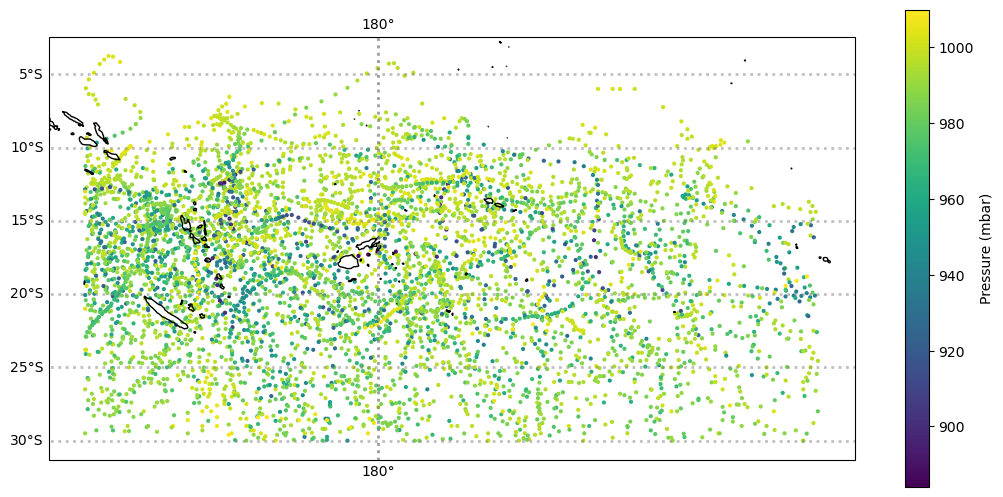

In [29]:
plt.figure(figsize=(13,6.2))
    
ax = plt.subplot(111, projection=ccrs.PlateCarree(central_longitude = 180))
ax.coastlines(zorder=2);
ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True, linewidth=2, color='gray', linestyle=':',  alpha=.5)

im = ax.scatter(data.lon, data.lat, s=4, c=data.pres, transform=ccrs.PlateCarree())

plt.colorbar(im).set_label('Pressure (mbar)')

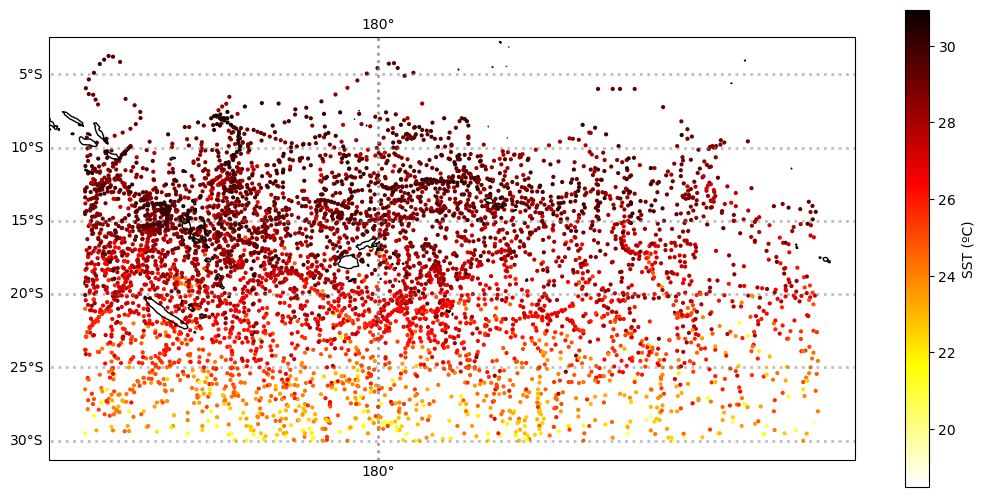

In [30]:
plt.figure(figsize=(13,6.2))
    
ax = plt.subplot(111, projection=ccrs.PlateCarree(central_longitude = 180))
ax.coastlines(zorder=2);
ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True, linewidth=2, 
             color='gray', linestyle=':',  alpha=.5)

im = ax.scatter(data.lon, data.lat, s=4, c=data.sst, cmap = 'hot_r',
                transform=ccrs.PlateCarree())

plt.colorbar(im).set_label('SST (ºC)')

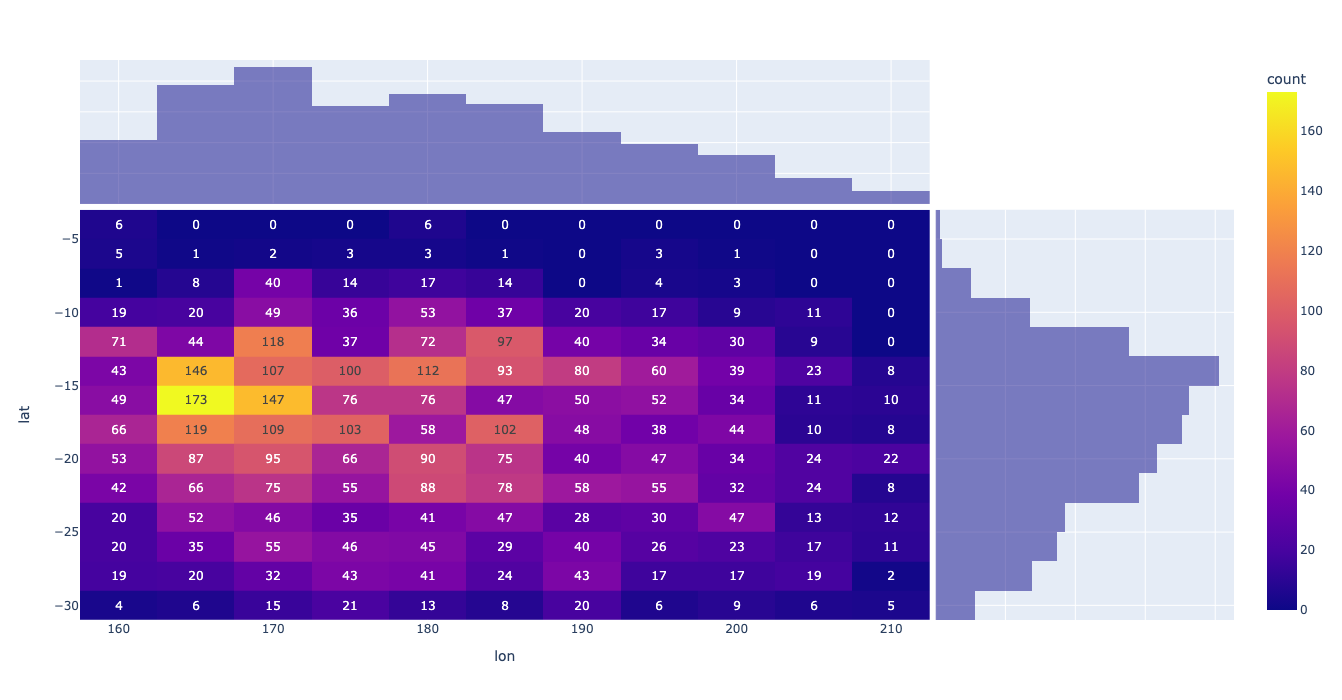

In [31]:
fig = px.density_heatmap(data, x="lon", y="lat", text_auto = True, marginal_x="histogram", marginal_y="histogram")
fig.update_layout(
    width=700,
    height=700,
)
fig.show()

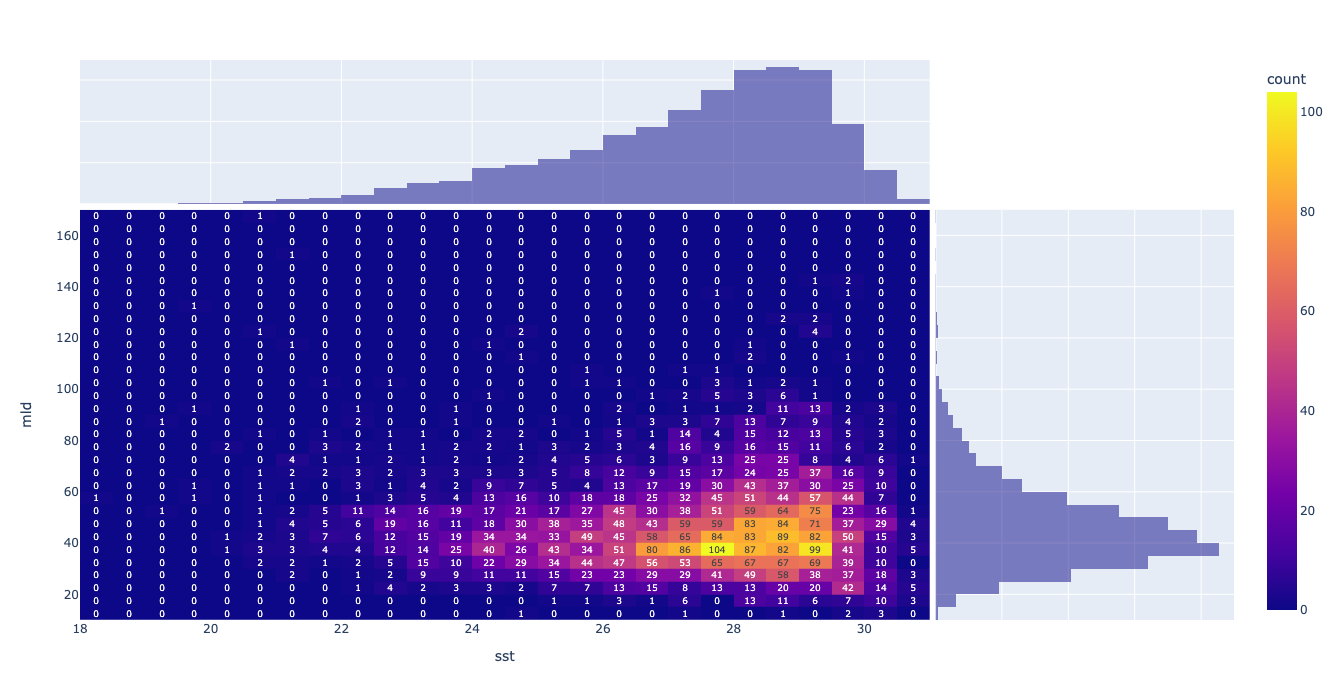

In [32]:
fig = px.density_heatmap(data, x="sst", y="mld",text_auto = True, marginal_x="histogram", marginal_y="histogram")
fig.update_layout(
    width=700,
    height=700,
)
fig.show()

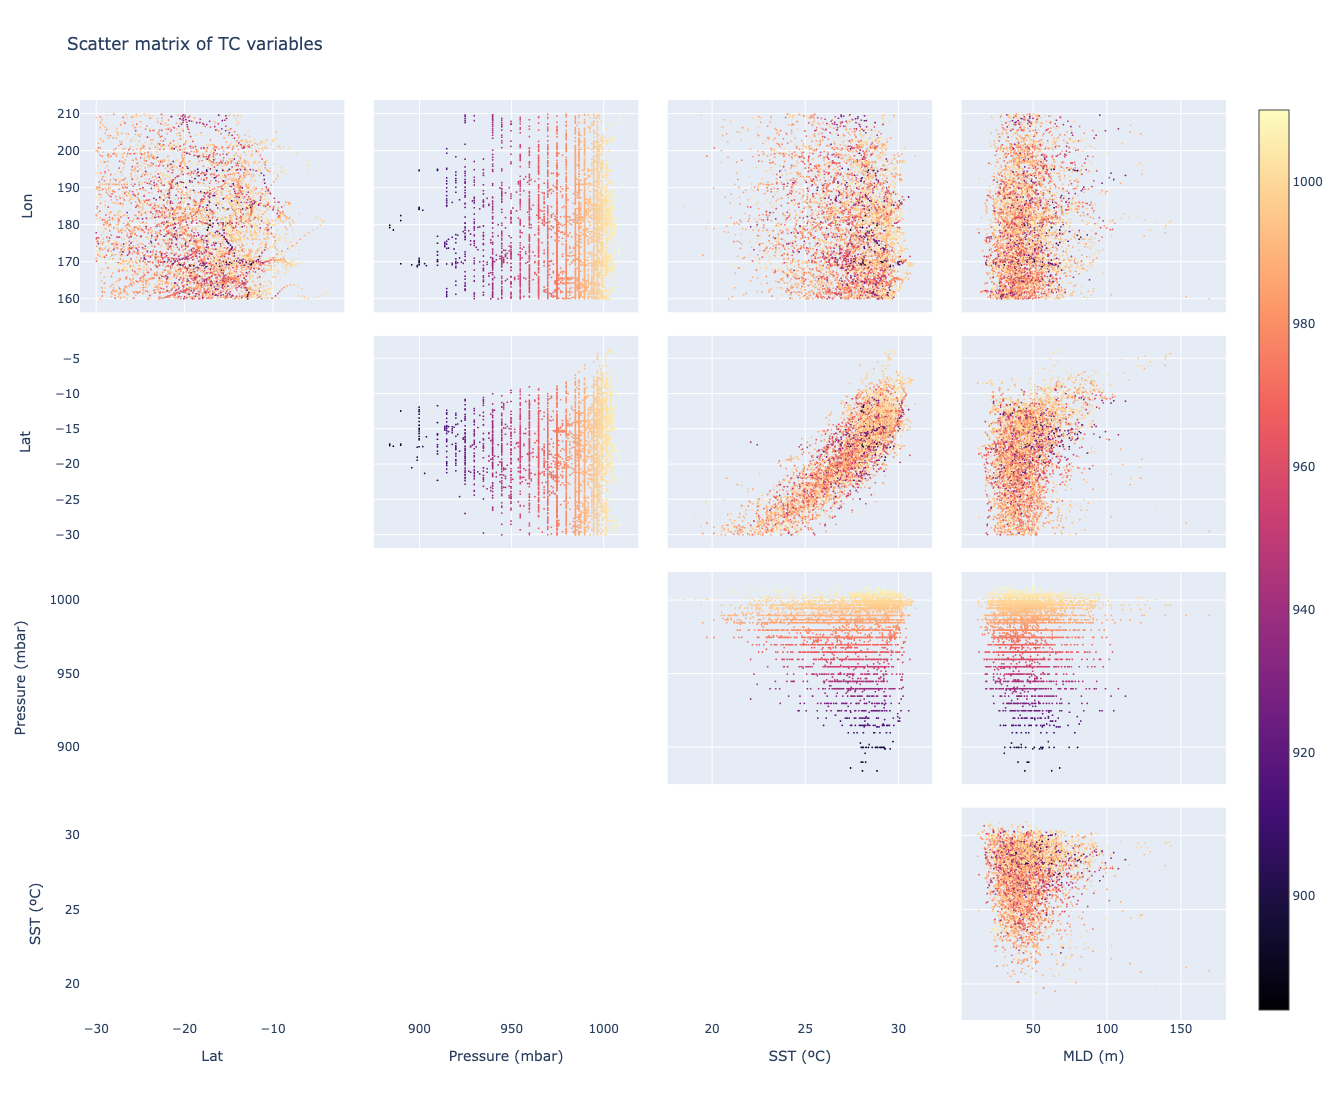

In [ ]:
fig = go.Figure(data=go.Splom(
                dimensions=[dict(label='Lon',
                                 values=data['lon']),
                            dict(label='Lat',
                                 values=data['lat']),
                            dict(label='Pressure (mbar)',
                                 values=data['pres']),
                            dict(label='SST (ºC)',
                                 values=data['sst']),
                            dict(label='MLD (m)',
                                 values=data['mld'])],
                showlowerhalf=False, # remove plots on diagonal
                diagonal=dict(visible=False),
                text=data['pres'],
                marker=dict(color=data['pres'],
                            colorscale='magma',
                            showscale=True, # colorbar
                            size=2)
                ))


fig.update_layout(
    title='Scatter matrix of TC variables',
    width=1100,
    height=1100,
)

fig.show()

In [15]:
data.corr().style.background_gradient(cmap = 'coolwarm', vmin=-1, vmax=1)


In [19]:
data.groupby(by='category').count()

storm   lon   lat  pres   sst   mld
category                                     
0           466   466   466   466   466   466
1          3321  3321  3321  3321  3321  3321
2           835   835   835   835   835   835
3           514   514   514   514   514   514
4           282   282   282   282   282   282
5           100   100   100   100   100   100

In [44]:
data.loc[data.pres == np.min(data.pres)]

st         lon        lat   pres        sst  \
time                                                                            
2016-02-20 00:00:00.000039936  12932  179.949997 -17.100000  884.0  28.879999   
2016-02-20 03:00:00.000039936  12932  179.315033 -17.299789  884.0  28.099998   

                                     mld  
time                                      
2016-02-20 00:00:00.000039936  44.458336  
2016-02-20 03:00:00.000039936  62.666672

## Boxplot

In [20]:
data['month'] = data.index.strftime('%m').astype(int)

In [21]:
data['year'] = data.index.strftime('%Y').astype(int)

In [22]:
data.loc[data.pres == np.min(data.pres)]

storm         lon        lat   pres        sst  \
time                                                                            
2016-02-20 00:00:00.000039936  12932  179.949997 -17.100000  884.0  28.879999   
2016-02-20 03:00:00.000039936  12932  179.315033 -17.299789  884.0  28.099998   

                                     mld  category  month  year  
time                                                             
2016-02-20 00:00:00.000039936  44.458336         5      2  2016  
2016-02-20 03:00:00.000039936  62.666672         5      2  2016

In [25]:
np.unique(data.loc[data.category==4].month)

array([ 1,  2,  3,  4,  5, 10, 12])

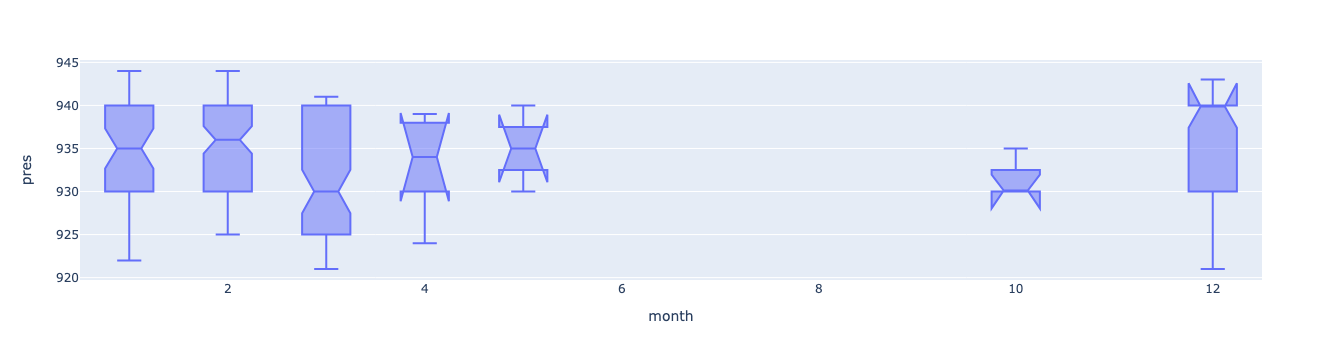

In [24]:
# Use plotly for plotting boxplot
fig = px.box(data.loc[data.category==4], x="month", y="pres", notched=True)
fig.show()

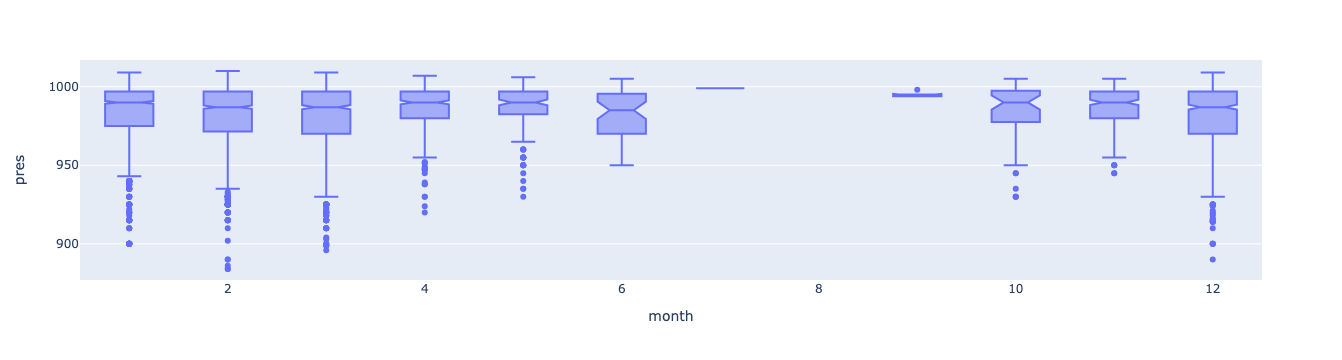

In [53]:
# Use plotly for plotting boxplot
fig = px.box(data, x="month", y="pres", notched=True)
fig.show()

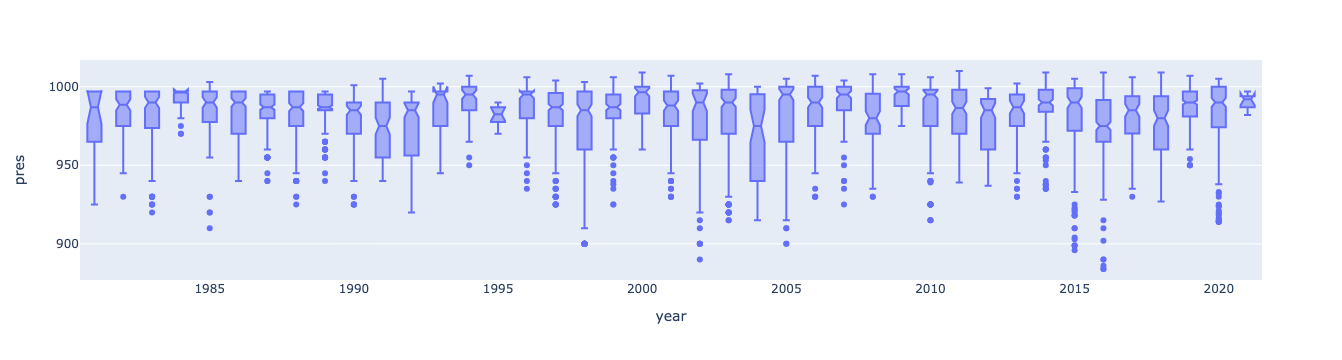

In [54]:
# Use plotly for plotting boxplot
fig = px.box(data, x="year", y="pres", notched=True)
fig.show()

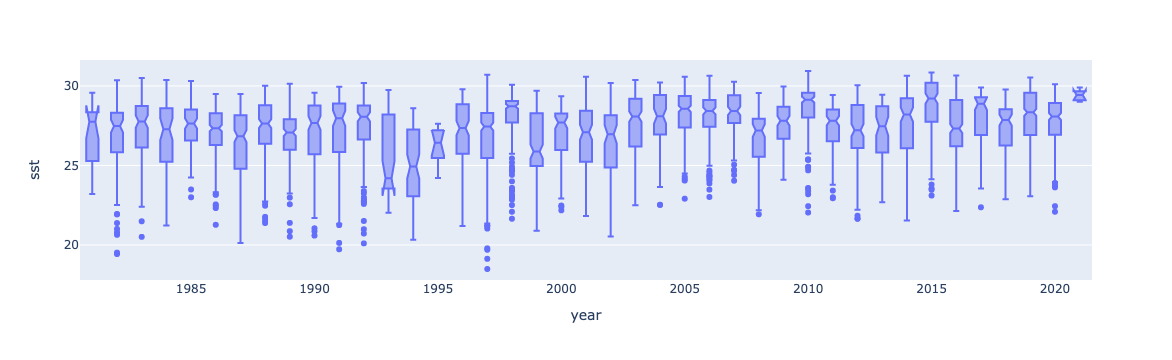

In [57]:
# Use plotly for plotting boxplot
fig = px.box(data, x="year", y="sst", notched=True)
fig.show()

<AxesSubplot:xlabel='year'>

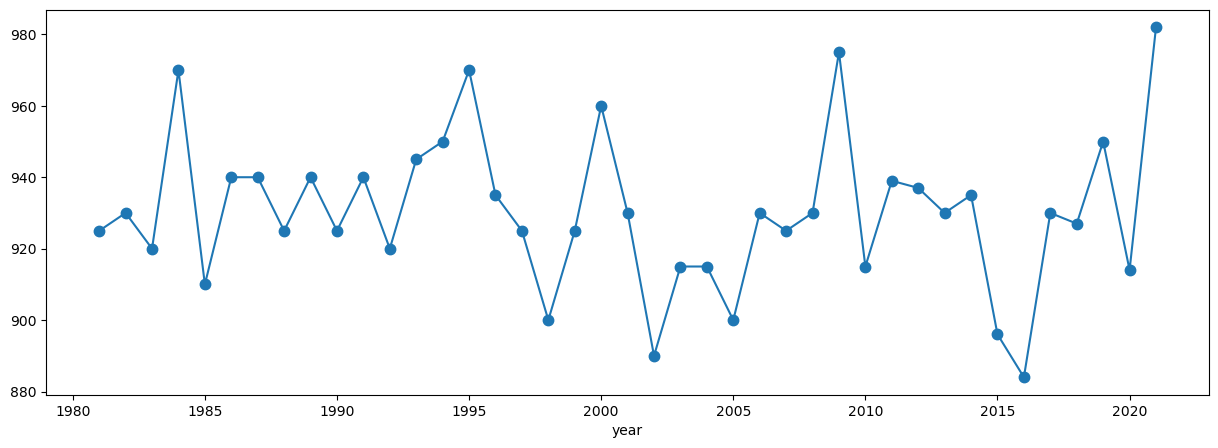

In [34]:
data.groupby(by = 'year').pres.min().plot(marker = '.', markersize=15, figsize = [15,5])

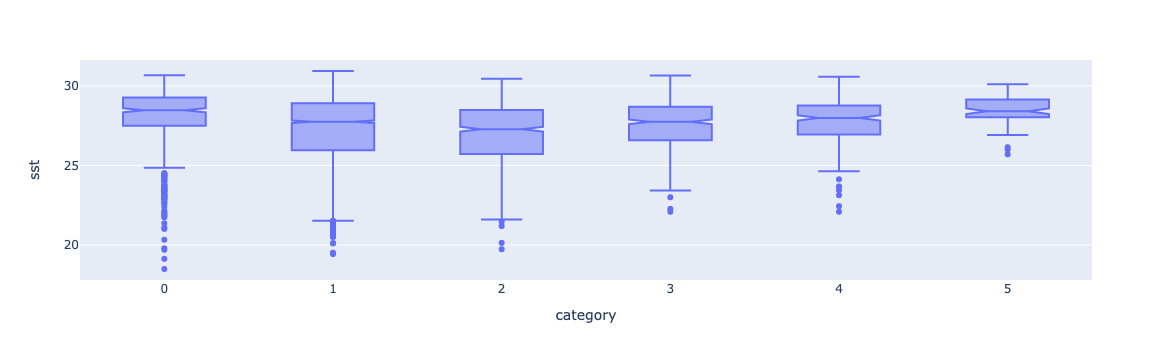

In [35]:
# Use plotly for plotting boxplot
fig = px.box(data, x="category", y="sst", notched=True)
fig.show()

In [38]:
data.groupby('category').min()

st         lon        lat    pres        sst        mld  month  \
category                                                                     
0         9604  160.000000 -30.000000  1001.0  18.490000  16.333332      1   
1         9245  160.000000 -30.000000   980.0  19.430000  12.458333      1   
2         9245  160.019989 -30.000000   965.0  19.730000  13.333333      1   
3         9245  160.024994 -30.000000   945.0  22.090000  16.875000      1   
4         9245  160.000000 -29.742859   921.0  22.090000  18.000000      1   
5         9365  160.649994 -22.257145   884.0  25.699999  27.833334      1   

          year  
category        
0         1985  
1         1981  
2         1981  
3         1981  
4         1981  
5         1983

## Monthly Data

<AxesSubplot:xlabel='month'>

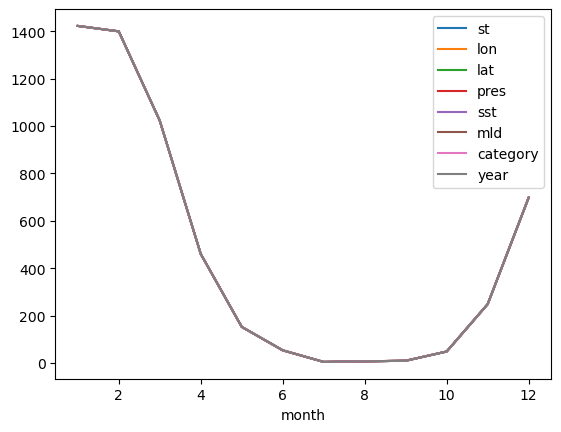

In [58]:
counts = data.groupby(by = 'month').count()
counts.plot()

In [15]:
data_month = data.groupby(by = [data.index.month, data.index.year]).min()
data_month

st         lon        lat    pres        sst        mld  month
time time                                                                   
1    1982   9255  166.100006 -24.530008   965.0  24.580000  15.750000      1
     1983   9359  171.599991 -19.700001   955.0  26.859999  24.125000      1
     1984   9458  160.059998 -23.799999   997.0  23.529999  42.125004      1
     1985   9586  161.600006 -29.000002   955.0  23.490000  20.750000      1
     1986   9711  162.083328 -26.000002   997.0  24.799999  30.916666      1
...          ...         ...        ...     ...        ...        ...    ...
12   2012  12612  160.199997 -29.000000   940.0  21.650000  22.708334     12
     2015  12923  189.927795 -16.590530   975.0  28.139999  41.208332     12
     2018  13245  161.800003 -10.200000  1007.0  29.320000  56.791668     12
     2019  13353  175.397629 -21.200001   975.0  25.199999  30.250000     12
     2020  13464  171.597443 -25.900000   914.0  22.090000  24.541668     12

[180 rows x 7 columns]

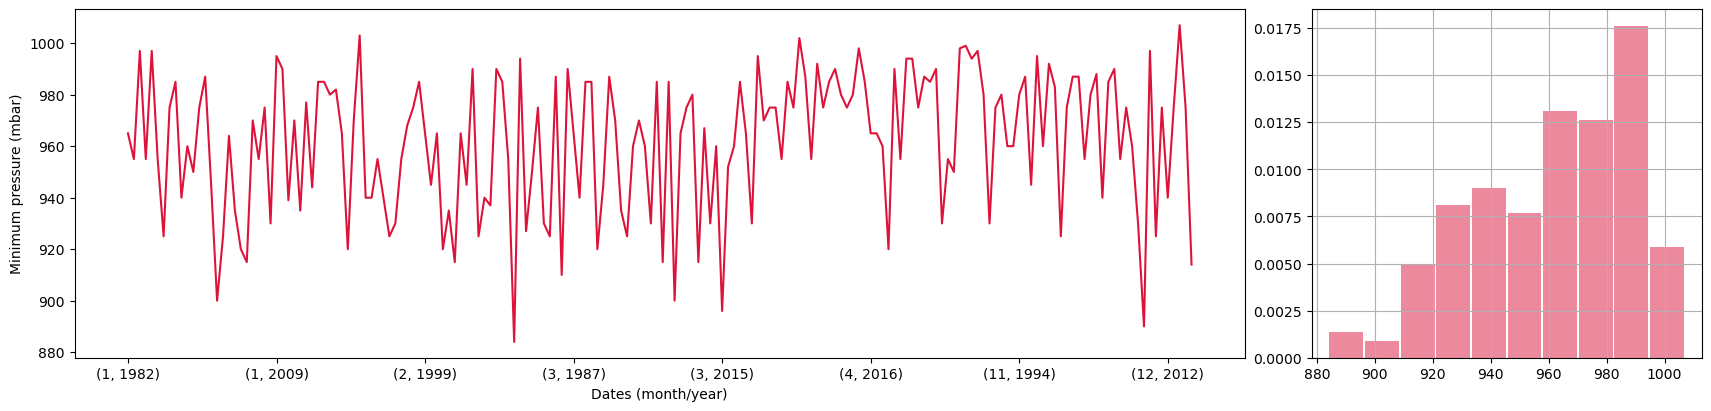

In [16]:
# Use pandas library for plotting daily series
fig = plt.figure(figsize=(17,4),constrained_layout=True)

data_month.pres.plot(
    color='crimson',ax=plt.subplot2grid((1, 4), (0, 0), colspan=3), 
    xlabel='Dates (month/year)',
    ylabel='Minimum pressure (mbar)')

data_month.pres.hist(
    ax=plt.subplot2grid((1, 4), (0, 3)), 
    color='crimson',alpha=0.5, density=1,
    rwidth=0.95
)
plt.show()

## CATEGORY 5

In [51]:
data5 = data.loc[data.category==5]

In [55]:
data5.describe()

storm         lon         lat        pres         sst  \
count    100.000000  100.000000  100.000000  100.000000  100.000000   
mean   11883.160000  178.101852  -16.255726  910.179993   28.488899   
std      944.842114   10.369370    2.531164    9.531849    0.862234   
min     9365.000000  160.649994  -22.257145  884.000000   25.699999   
25%    11088.000000  169.786552  -17.939846  900.000000   28.029999   
50%    11728.000000  175.137589  -16.033214  915.000000   28.410000   
75%    12826.000000  186.025002  -14.568750  918.000000   29.147500   
max    13465.000000  200.649994  -11.650000  920.000000   30.099998   

              mld  category       month         year  
count  100.000000     100.0  100.000000   100.000000  
mean    50.600006       5.0    3.720000  2005.520000  
std     12.272462       0.0    3.850961     8.901799  
min     27.833334       5.0    1.000000  1983.000000  
25%     40.947917       5.0    1.000000  1998.000000  
50%     49.166666       5.0    2.000000  2004.000000  
75%     58.531251       5.0    3.000000  2015.000000  
max     82.416664       5.0   12.000000  2020.000000